#Final   
VIP CUP   
______
**SPA Group**  
Sajad Jabarzade Ghandilou   
Parham Soltani   
Amirtaha Aghasi
______   


##Libraries

In [ ]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

##Preparing Data

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Instance.jpg to Instance (1).jpg
Saving Standard_image.png to Standard_image.png


### Code

Average Tooth Distance:  378.37324219268686
Tooth Errors:  [129.62675780731314, 231.67286727837384, 347.95942954119573, 114.32589795306001, 50.701343398210156, 133.56620735188574, 9.782654323133158, 219.37009756969522, 358.14949377653016, 277.37324219268686, 364.0554211294105, 272.37324219268686, 293.27917659466766, 261.219497054087, 256.22579031586713, 365.22029575472095, 352.06734931675504, 132.354950189836, 101.30826786355948, 507.64086604713117, 574.645645343127, 589.627274336101, 380.65903643583107, 326.89509148775187, 73.34701381224085, 366.0039253158339, 292.53036246466286, 261.40743522329944, 219.65685738424912, 8.371890843803271, 26.231225386966855, 191.63465248948336, 245.33941190880756, 254.3692100001811, 268.33234070601236, 254.2281657699789, 305.62748880107455, 57.64510604509087, 227.63005812835928, 260.4834631615936, 315.16839318330125, 161.37324219268686, 219.69447972515746, 142.339346321776, 99.36607382599419, 88.25430106681, 293.28505264795626, 505.62732341799193, 307.

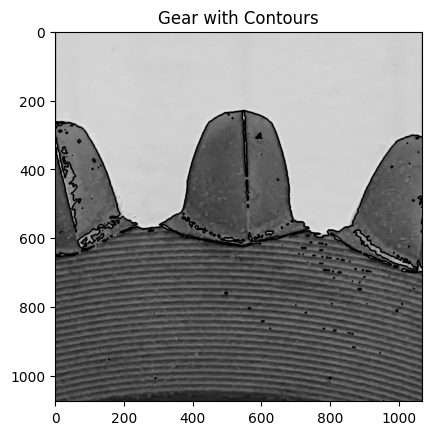

In [ ]:
# Load the image
image = cv2.imread('Instance.jpg', 0)  # Load in grayscale

# Thresholding the image to get the binary image
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours of the teeth
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Calculate distances between adjacent teeth
distances = []
for i in range(len(contours) - 1):
    # Assuming the tip of the tooth is the contour's centroid
    M1 = cv2.moments(contours[i])
    M2 = cv2.moments(contours[i+1])
    if M1['m00'] != 0 and M2['m00'] != 0:
        cx1 = int(M1['m10']/M1['m00'])
        cy1 = int(M1['m01']/M1['m00'])
        cx2 = int(M2['m10']/M2['m00'])
        cy2 = int(M2['m01']/M2['m00'])
        distances.append(calculate_distance((cx1, cy1), (cx2, cy2)))

# Calculate average distance and tooth error
average_distance = np.mean(distances)
tooth_errors = [abs(d - average_distance) for d in distances]

# Display the results
print("Average Tooth Distance: ", average_distance)
print("Tooth Errors: ", tooth_errors)

# Plotting the original image with contours
for contour in contours:
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 3)
plt.imshow(image, cmap='gray')
plt.title('Gear with Contours')
plt.show()


In [ ]:
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

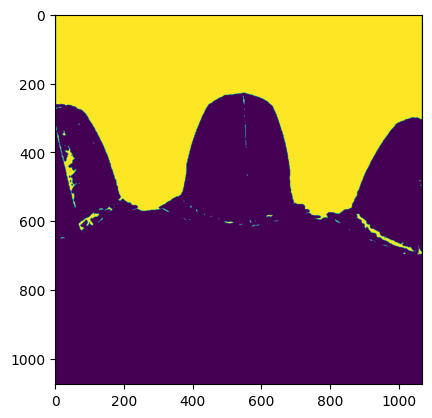

In [ ]:
plt.imshow(thresh)

Average Tooth Distance:  378.37324219268686
Tooth Errors:  [129.62675780731314, 231.67286727837384, 347.95942954119573, 114.32589795306001, 50.701343398210156, 133.56620735188574, 9.782654323133158, 219.37009756969522, 358.14949377653016, 277.37324219268686, 364.0554211294105, 272.37324219268686, 293.27917659466766, 261.219497054087, 256.22579031586713, 365.22029575472095, 352.06734931675504, 132.354950189836, 101.30826786355948, 507.64086604713117, 574.645645343127, 589.627274336101, 380.65903643583107, 326.89509148775187, 73.34701381224085, 366.0039253158339, 292.53036246466286, 261.40743522329944, 219.65685738424912, 8.371890843803271, 26.231225386966855, 191.63465248948336, 245.33941190880756, 254.3692100001811, 268.33234070601236, 254.2281657699789, 305.62748880107455, 57.64510604509087, 227.63005812835928, 260.4834631615936, 315.16839318330125, 161.37324219268686, 219.69447972515746, 142.339346321776, 99.36607382599419, 88.25430106681, 293.28505264795626, 505.62732341799193, 307.

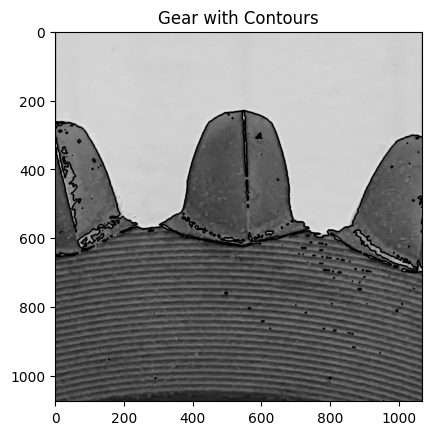

In [ ]:
# Load the image
image = cv2.imread('Instance.jpg', 0)  # Load in grayscale

# Thresholding the image to get the binary image
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours of the teeth
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Calculate distances between adjacent teeth
distances = []
for i in range(len(contours) - 1):
    # Assuming the tip of the tooth is the contour's centroid
    M1 = cv2.moments(contours[i])
    M2 = cv2.moments(contours[i+1])
    if M1['m00'] != 0 and M2['m00'] != 0:
        cx1 = int(M1['m10']/M1['m00'])
        cy1 = int(M1['m01']/M1['m00'])
        cx2 = int(M2['m10']/M2['m00'])
        cy2 = int(M2['m01']/M2['m00'])
        distances.append(calculate_distance((cx1, cy1), (cx2, cy2)))

# Calculate average distance and tooth error
average_distance = np.mean(distances)
tooth_errors = [abs(d - average_distance) for d in distances]

# Display the results
print("Average Tooth Distance: ", average_distance)
print("Tooth Errors: ", tooth_errors)

# Check if there are tooth errors
if any(error > 0 for error in tooth_errors):
    print("Tooth errors detected! Please inspect the gear for irregularities.")
else:
    print("No significant tooth errors found.")

# Plotting the original image with contours
for contour in contours:
    cv2.drawContours(image, [contour], 0, (0, 255, 0), 3)
plt.imshow(image, cmap='gray')
plt.title('Gear with Contours')
plt.show()


In [ ]:

# Load the gear image and the standard image
gear_image = cv2.imread('Instance.jpg')
gear_image=gear_image[0:600,300:800]
standard_image = cv2.imread('Standard_image.png')

# Convert images to grayscale
gear_gray = cv2.cvtColor(gear_image, cv2.COLOR_BGR2GRAY)
standard_gray = cv2.cvtColor(standard_image, cv2.COLOR_BGR2GRAY)

# Perform edge detection
gear_edges = cv2.Canny(gear_gray, 50, 150)
standard_edges = cv2.Canny(standard_gray, 50, 150)

# Find contours
contours_gear, _ = cv2.findContours(gear_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_standard, _ = cv2.findContours(standard_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Compare contours
# This is a simplified example; for a real application, you would need a more robust method
# to compare the shapes and identify chamfer symmetry errors
for contour in contours_gear:
    match = cv2.matchShapes(contour, contours_standard[0], 1, 0.0)
if match > 0.1:  # Threshold for error recognition
        print("Chamfer symmetry error detected.")


Chamfer symmetry error detected.


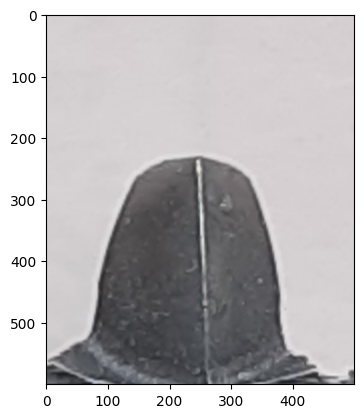

In [ ]:
plt.imshow(gear_image)


In [ ]:
match

3.49294704869428

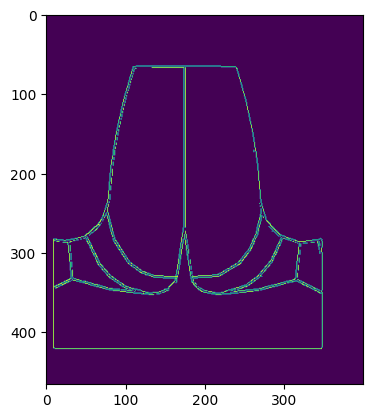

In [ ]:
plt.imshow(standard_edges)

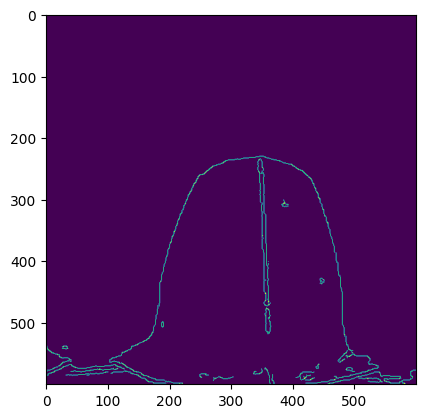

In [ ]:
plt.imshow(gear_edges)